# Exercises in Data Transformation and Exploratory Data Analysis

This notebook contains the exercises for the class of February 5, 2025, in the course Data & Things at Roskilde University.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

Plot the number of Cinemas in Danmark over the years. The next cell loads in the needed data for you if you have the file "DK_cinemas.csv" in the same folder as this notebook. 

In [4]:
cinema_data = pd.read_csv('DK_cinemas.csv', sep=";")
years = cinema_data["Year"].tolist()
cinemas = cinema_data["Cinemas"].tolist()

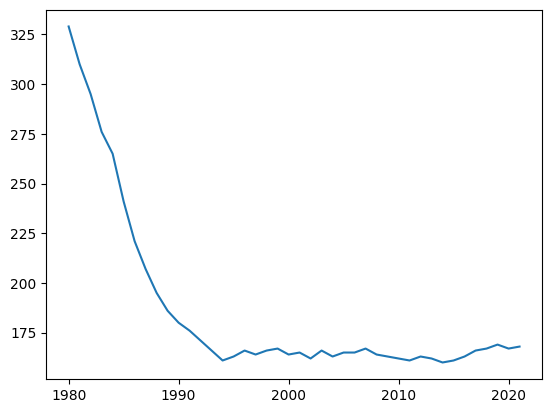

In [5]:
plt.plot(years, cinemas)

## Exercise 2

In this exercise, we are going to use the `penguins` dataset from the Seaborn package. The cell below loads the data

In [6]:
penguins_data = sns.load_dataset("penguins")

Based on the `Penguins` dataset, answer the following questions:

1. Make a barplot that shows how many penguins there are of each species in the dataset. Support the plot by calculating the numbers.
2. Make a barplot that shows the average body mass for each species of penguin. Support the plot by calculating the numbers
3. Make a boxplots that shows the distribution of the body mass for each species of penguin. Support the plot by calculating the numbers.
4. Make a scatterplot that shows the correlation between body mass (in g) and flipper length (in mm). Support the plot by calculating the numbers.
5. Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.
6. Visualise how the linear correlation between body mass and flipper length varies between species and sex.

<h1>Before starting working on the data frame i might do some cleaning ?????


In [7]:
penguins_data.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


#### 1. Make a barplot that shows how many penguins there are of each species in the dataset. Support the plot by calculating the numbers.


In [8]:
species_count = penguins_data['species'].value_counts()
species_count

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

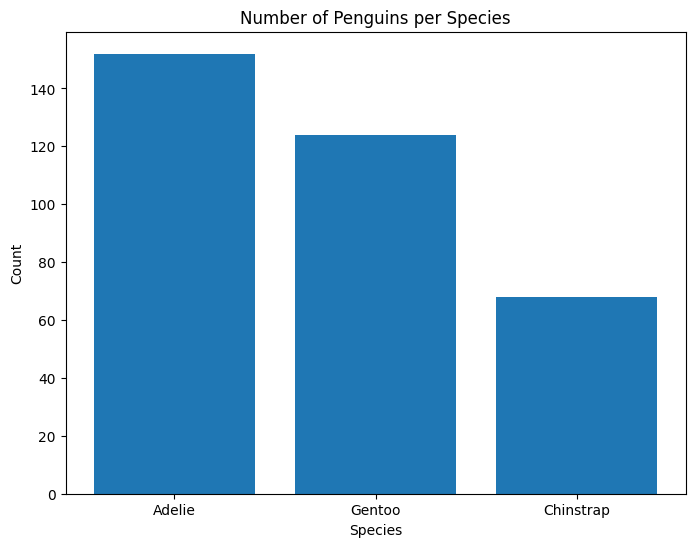

In [9]:
plt.figure(figsize=(8, 6))
plt.bar(species_count.index, species_count.values)
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Number of Penguins per Species")
plt.show()

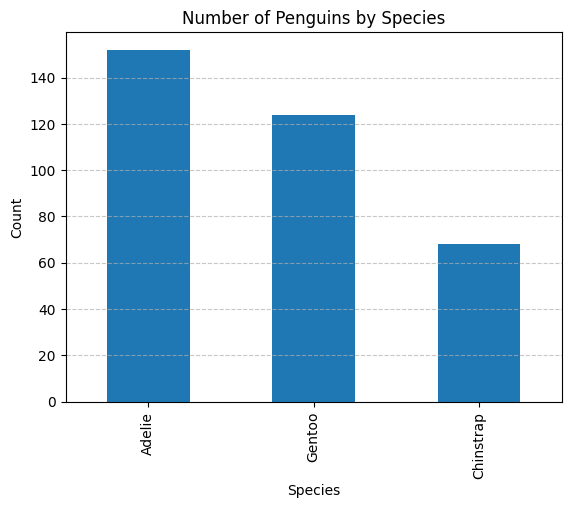

In [10]:
species_count.plot(kind='bar')
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Number of Penguins by Species")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 2. Make a barplot that shows the average body mass for each species of penguin. Support the plot by calculating the numbers

In [11]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
avg_body_mass = penguins_data.groupby('species')['body_mass_g'].mean()
print(avg_body_mass)

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


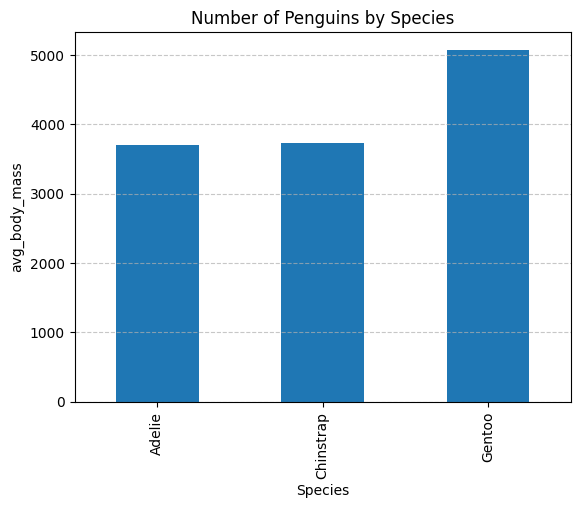

In [13]:
avg_body_mass.plot(kind='bar')
plt.xlabel("Species")
plt.ylabel("avg_body_mass")
plt.title("Number of Penguins by Species")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 3. Make a boxplots that shows the distribution of the body mass for each species of penguin. Support the plot by calculating the numbers.

In [14]:
species_mass = penguins_data.groupby('species')['body_mass_g'].describe()
print(species_mass)

           count         mean         std     min     25%     50%     75%  \
species                                                                     
Adelie     151.0  3700.662252  458.566126  2850.0  3350.0  3700.0  4000.0   
Chinstrap   68.0  3733.088235  384.335081  2700.0  3487.5  3700.0  3950.0   
Gentoo     123.0  5076.016260  504.116237  3950.0  4700.0  5000.0  5500.0   

              max  
species            
Adelie     4775.0  
Chinstrap  4800.0  
Gentoo     6300.0  


<Axes: xlabel='species', ylabel='body_mass_g'>

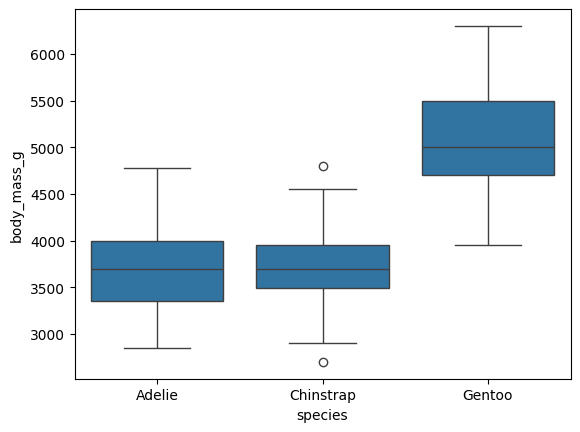

In [15]:
sns.boxplot(x=penguins_data['species'], y=penguins_data['body_mass_g'])

C:\Users\Jlo\AppData\Local\Temp\ipykernel_15772\1152309239.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(species_data, labels=species_list, patch_artist=True)


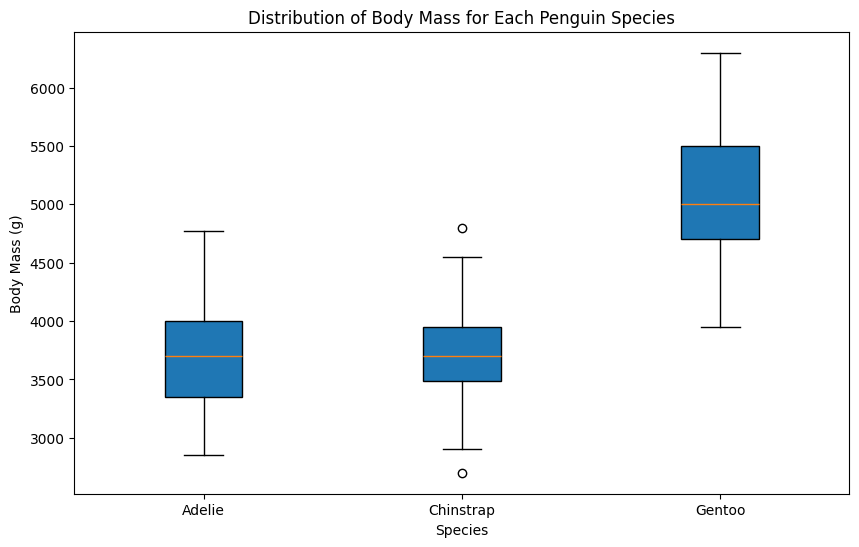

In [16]:
species_list = penguins_data['species'].unique()
species_data = [penguins_data[penguins_data['species'] == species]['body_mass_g'].dropna() for species in species_list]

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(species_data, labels=species_list, patch_artist=True)

# Titles and labels
plt.title("Distribution of Body Mass for Each Penguin Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")

# Show the plot
plt.show()



#### 4. Make a scatterplot that shows the correlation between body mass (in g) and flipper length (in mm). Support the plot by calculating the numbers.

In [17]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


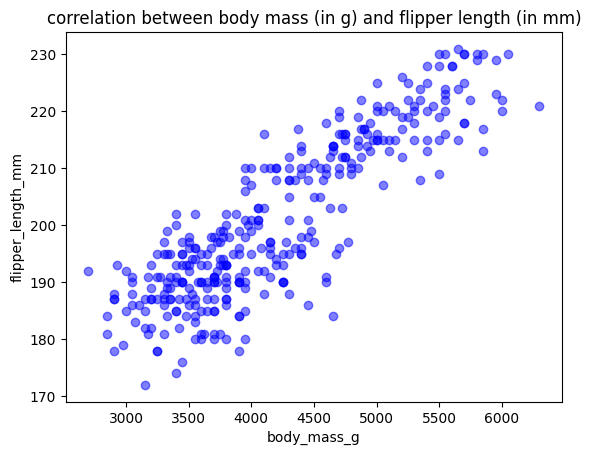

In [18]:
plt.scatter(penguins_data['body_mass_g'], penguins_data['flipper_length_mm'], color='blue', alpha=0.5, marker='o')

plt.title("correlation between body mass (in g) and flipper length (in mm)")
plt.xlabel("body_mass_g")
plt.ylabel("flipper_length_mm")

plt.show()

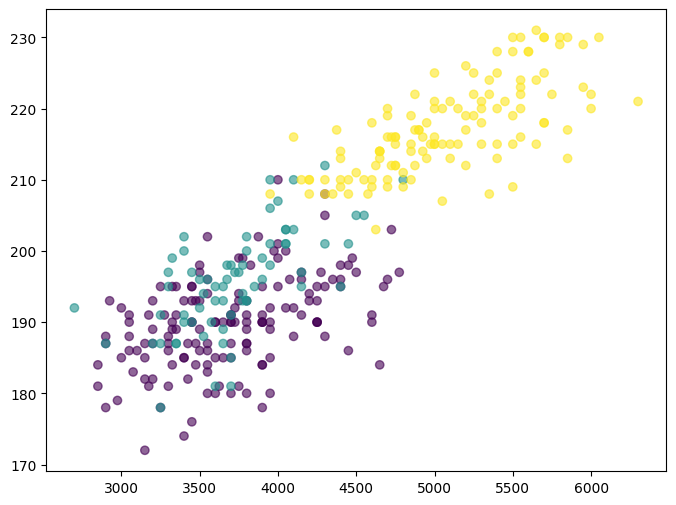

In [19]:
species_codes = penguins_data['species'].astype('category').cat.codes
plt.figure(figsize=(8,6))
scatter = plt.scatter(penguins_data['body_mass_g'],
                      penguins_data['flipper_length_mm'], 
                      c=species_codes, cmap='viridis', alpha=0.6, marker='o'
)


C:\Users\Jlo\AppData\Local\Temp\ipykernel_15772\4248976113.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


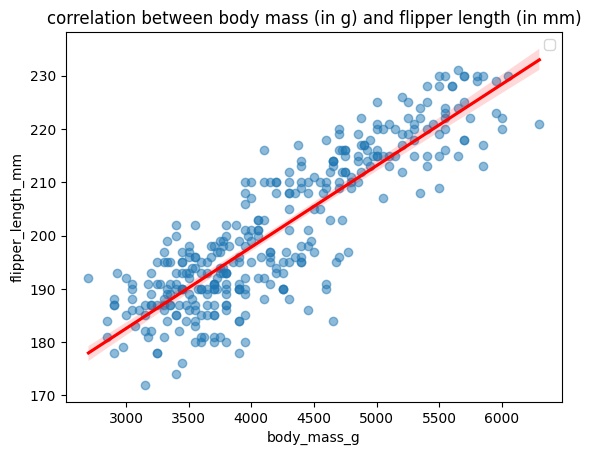

In [20]:
X = penguins_data['body_mass_g']
Y = penguins_data['flipper_length_mm']




sns.regplot(x=X, y=Y, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("correlation between body mass (in g) and flipper length (in mm)")
plt.xlabel("body_mass_g")
plt.ylabel("flipper_length_mm")
plt.legend()


plt.show()

In [21]:
cor = penguins_data[['body_mass_g', 'flipper_length_mm']].corr()
print(cor)

                   body_mass_g  flipper_length_mm
body_mass_g           1.000000           0.871202
flipper_length_mm     0.871202           1.000000


<Figure size 800x600 with 0 Axes>

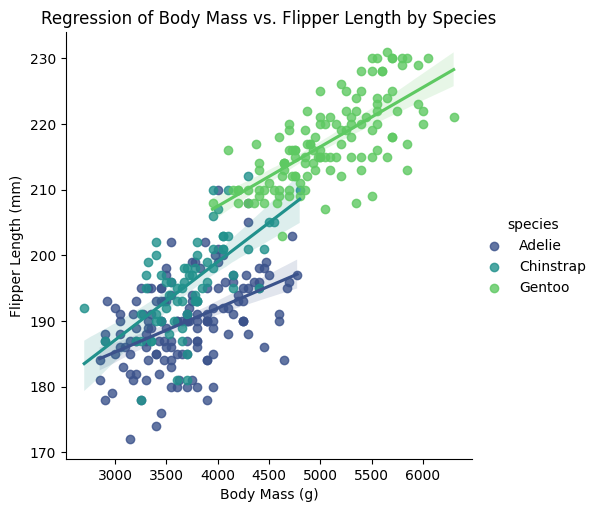

In [22]:
plt.figure(figsize=(8,6))
sns.lmplot(data=penguins_data, x="body_mass_g", y="flipper_length_mm", hue="species", palette="viridis")

# Titles and labels
plt.title("Regression of Body Mass vs. Flipper Length by Species")
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")

plt.show()

In [23]:
cor_by_species = penguins_data.groupby('species')[['body_mass_g', 'flipper_length_mm']].corr().unstack().iloc[:, 1]
print(cor_by_species)


species
Adelie       0.468202
Chinstrap    0.641559
Gentoo       0.702667
Name: (body_mass_g, flipper_length_mm), dtype: float64


#### 4. Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.

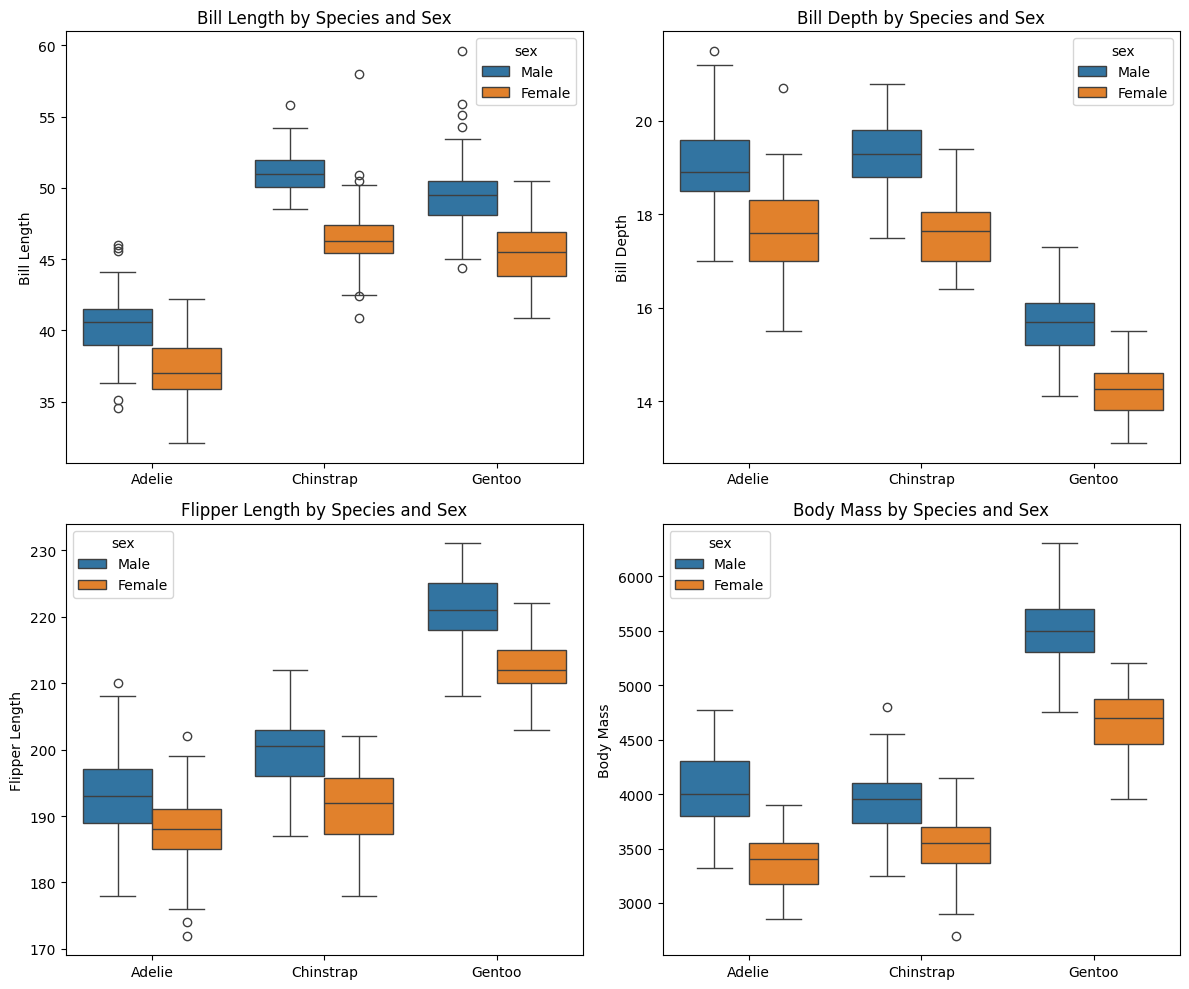

In [24]:


# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# List of features to plot
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
titles = ["Bill Length", "Bill Depth", "Flipper Length", "Body Mass"]

# Create boxplots for each feature
for i, feature in enumerate(features):
    row, col = i // 2, i % 2  # Calculate subplot position
    sns.boxplot(x="species", y=feature, hue="sex", data=penguins_data, ax=axes[row, col])
    axes[row, col].set_title(f"{titles[i]} by Species and Sex")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel(titles[i])

# Adjust layout
plt.tight_layout()
plt.show()


#### 6. Visualise how the linear correlation between body mass and flipper length varies between species and sex.

In [25]:



grouped_by_species_sex = penguins_data.groupby(['species', 'sex'])[['body_mass_g', 'flipper_length_mm']]


# Display the correlations
grouped_by_species_sex.corr().unstack().iloc[:,1]


species    sex   
Adelie     Female    0.262930
           Male      0.360434
Chinstrap  Female    0.242150
           Male      0.664588
Gentoo     Female    0.487618
           Male      0.330452
Name: (body_mass_g, flipper_length_mm), dtype: float64

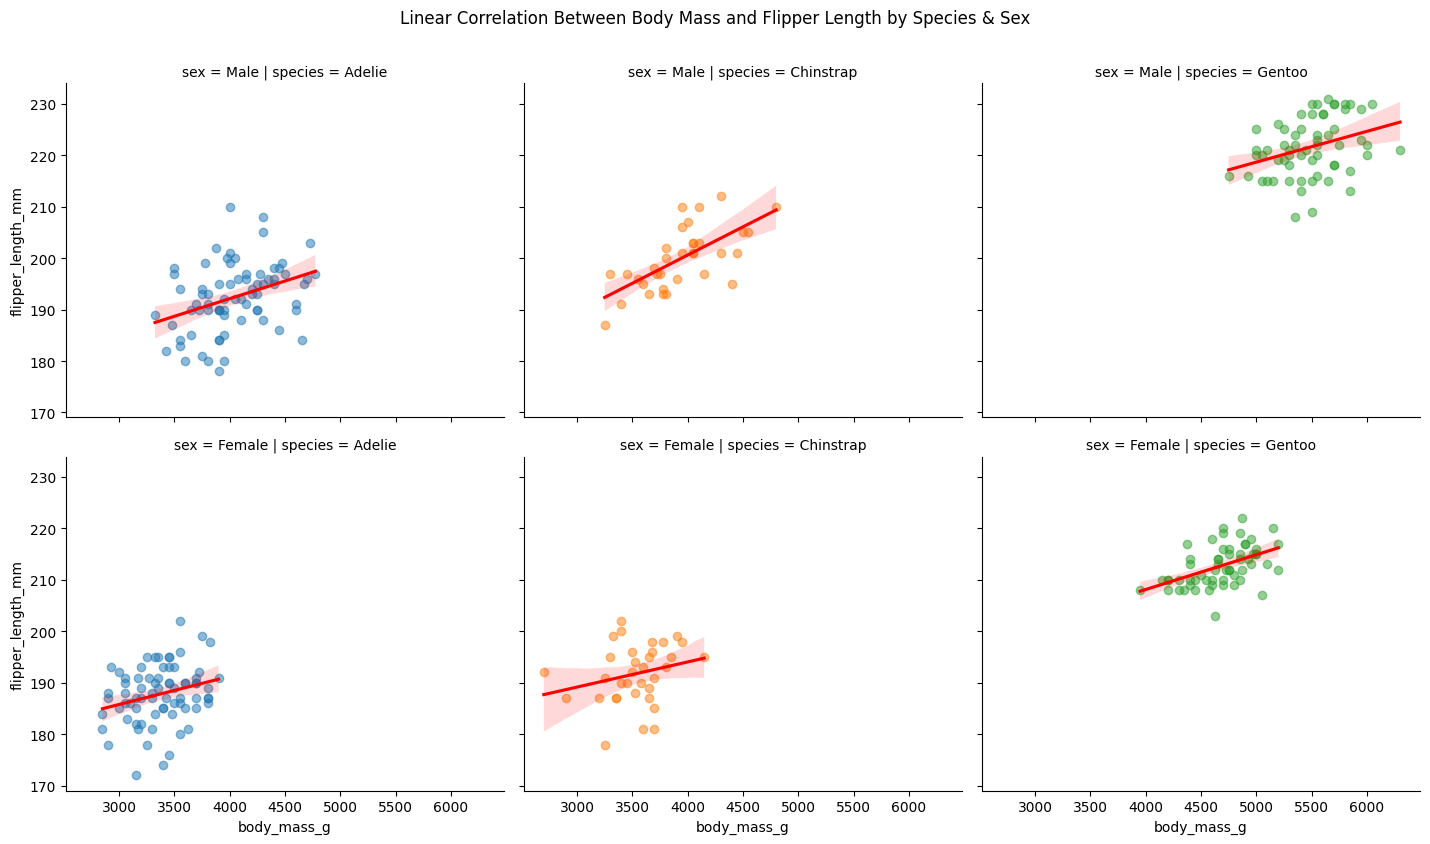

In [26]:

# Use Seaborn's lmplot to automatically create subplots for each species and sex
sns.lmplot(
    data=penguins_data, 
    x="body_mass_g", 
    y="flipper_length_mm", 
    col="species", 
    row="sex", 
    hue="species",  
    scatter_kws={"alpha": 0.5}, 
    line_kws={"color": "red"},
    height=4,  
    aspect=1.2
)

# Add a title
plt.suptitle("Linear Correlation Between Body Mass and Flipper Length by Species & Sex", y=1.05)
plt.show()


In [28]:
from scipy.stats import zscore

# Drop missing values in numerical columns before computing z-score
numeric_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
penguins_clean = penguins_data[numeric_cols].dropna()

# Compute Z-scores
z_scores = penguins_clean.apply(zscore)

# Count outliers
outliers = (z_scores.abs() > 3).sum()
print("Number of outliers per feature:\n", outliers)


Number of outliers per feature:
 bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64


## Exercise 3

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

In [32]:
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 
X["income"] = y
adult_data = X.copy()

adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [50]:
missing_values = adult_data.isnull().sum()
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [48]:
adult_data["workclass"] = adult_data["workclass"].fillna(adult_data["workclass"].mode()[0])
adult_data["occupation"] = adult_data["occupation"].fillna(adult_data["occupation"].mode()[0])
adult_data["native-country"] = adult_data["native-country"].fillna("Unknown")


In [49]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<br> Here we see the variabels the dataset contains and what type the differint data is <br/>

In [52]:
adult_data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,43,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,34869,NaN,15784,NaN,22379,7138,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


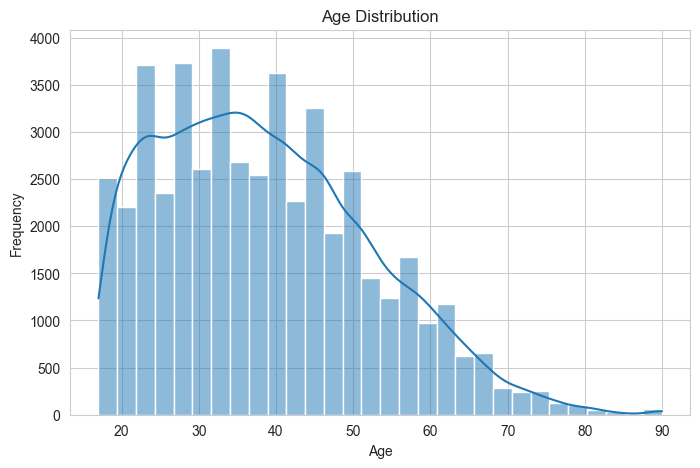

C:\Users\Jlo\AppData\Local\Temp\ipykernel_15772\2888462216.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adult_data, x='income', palette='coolwarm')


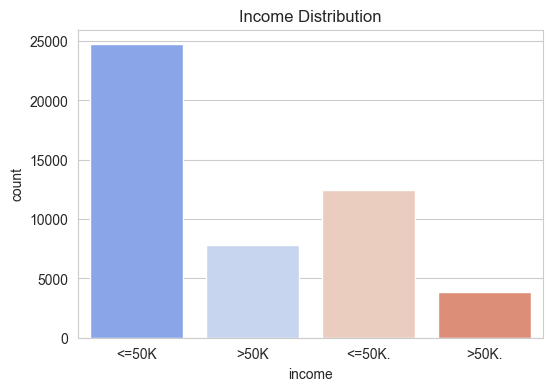

C:\Users\Jlo\AppData\Local\Temp\ipykernel_15772\2888462216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=adult_data['education'], order=adult_data['education'].value_counts().index, palette="viridis")


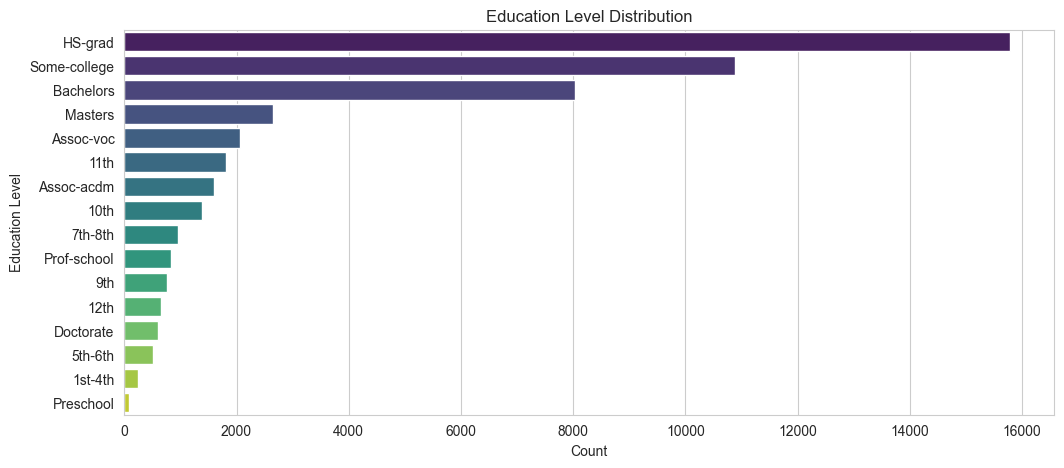

In [53]:

sns.set_style("whitegrid")

# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(adult_data['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Income Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=adult_data, x='income', palette='coolwarm')
plt.title("Income Distribution")
plt.show()

# Education Level Distribution
plt.figure(figsize=(12, 5))
sns.countplot(y=adult_data['education'], order=adult_data['education'].value_counts().index, palette="viridis")
plt.title("Education Level Distribution")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()


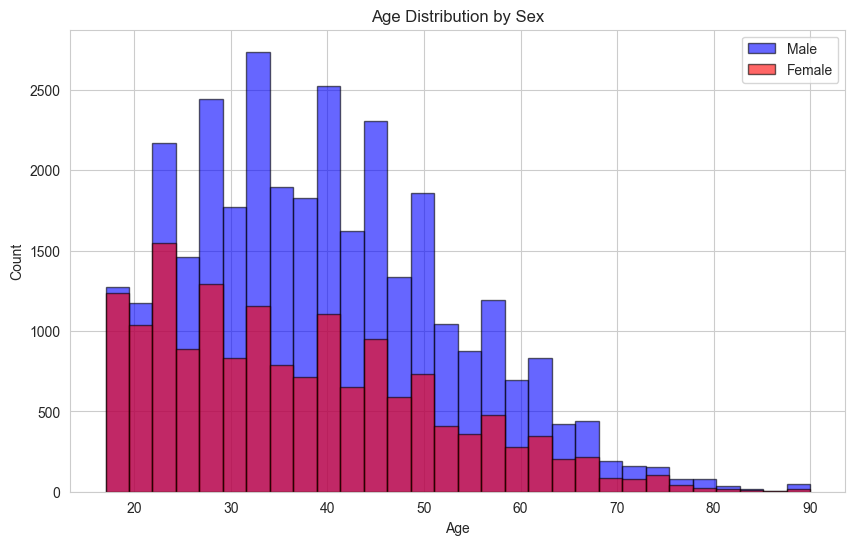

In [54]:


# Filter data by sex
male_ages = adult_data[adult_data['sex'] == 'Male']['age']
female_ages = adult_data[adult_data['sex'] == 'Female']['age']

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(male_ages, bins=30, alpha=0.6, color='blue', label="Male", edgecolor="black")
plt.hist(female_ages, bins=30, alpha=0.6, color='red', label="Female", edgecolor="black")

# Titles and labels
plt.title("Age Distribution by Sex")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()

# Show plot
plt.show()


#### Normalize for numbers. %


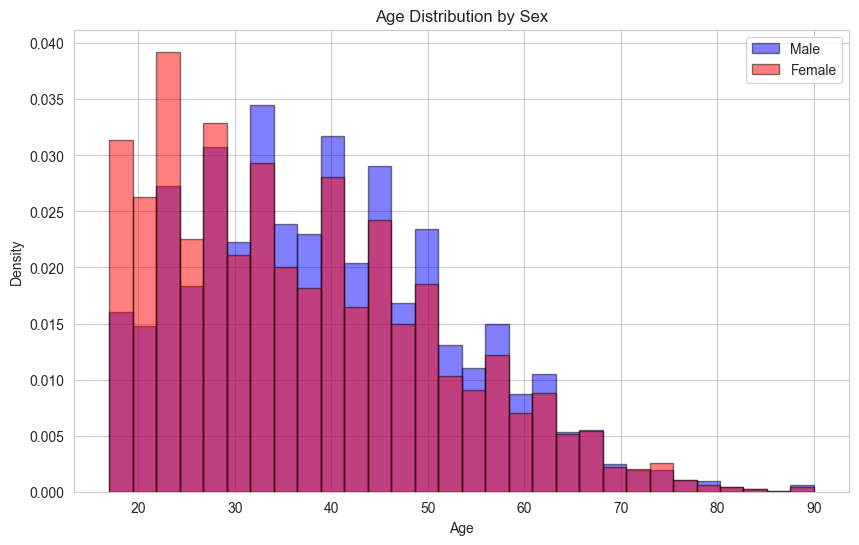

In [55]:


# Filter data by sex
male_ages = adult_data[adult_data['sex'] == 'Male']['age']
female_ages = adult_data[adult_data['sex'] == 'Female']['age']

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(male_ages, bins=30, alpha=0.5, color='blue', label="Male", edgecolor="black", density=True)
plt.hist(female_ages, bins=30, alpha=0.5, color='red', label="Female", edgecolor="black", density=True)

# Titles and labels
plt.title("Age Distribution by Sex")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

# Show plot
plt.show()


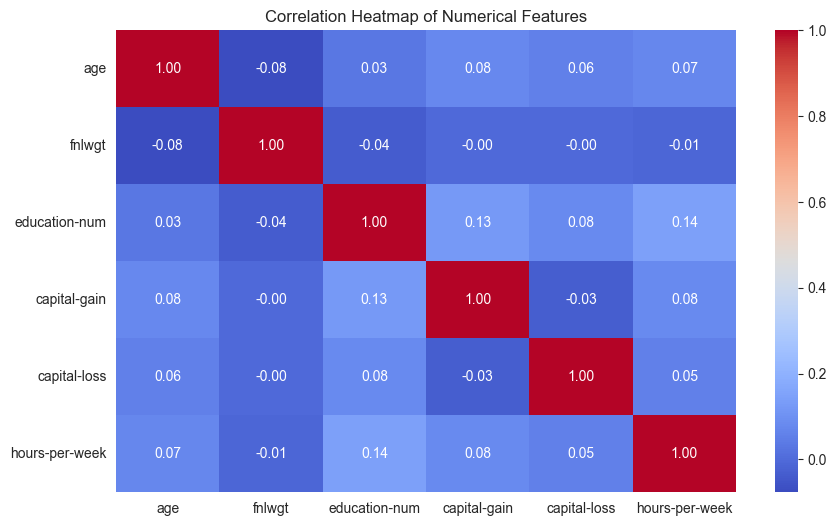

In [58]:
# Select only numeric columns
numeric_data = adult_data.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [61]:
adult_data['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [62]:
# Strip whitespace and periods from 'income' column
adult_data['income'] = adult_data['income'].str.strip().str.replace(r'\.$', '', regex=True)

# Verify that it worked
print(adult_data['income'].unique())

['<=50K' '>50K']


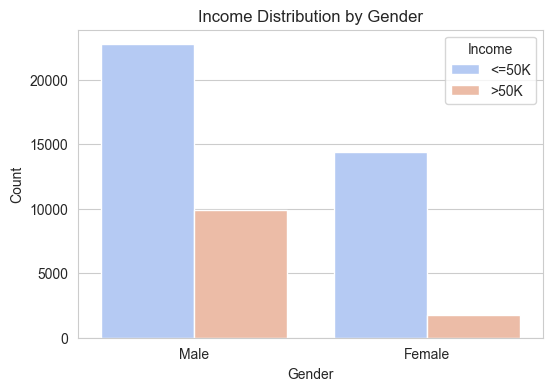

In [63]:
plt.figure(figsize=(6, 4))
sns.countplot(data=adult_data, x='sex', hue='income', palette="coolwarm")
plt.title("Income Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Income")
plt.show()


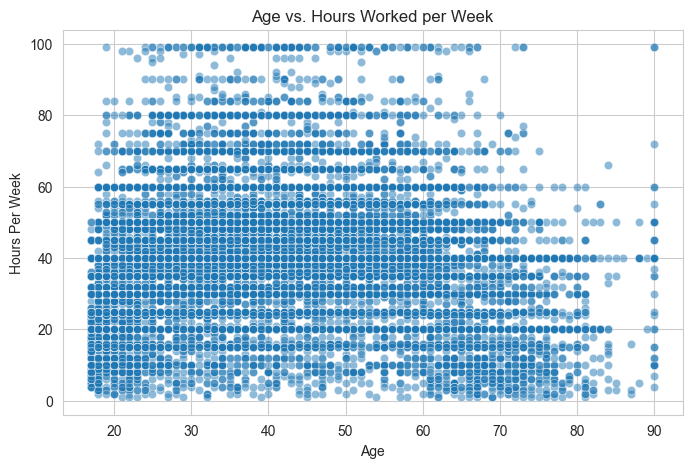

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='hours-per-week', data=adult_data, alpha=0.5)
plt.title("Age vs. Hours Worked per Week")
plt.xlabel("Age")
plt.ylabel("Hours Per Week")
plt.show()


In [65]:
correlation_value = adult_data[['age', 'hours-per-week']].corr().iloc[0,1]
print(f"Correlation between Age and Hours per Week: {correlation_value:.2f}")


Correlation between Age and Hours per Week: 0.07


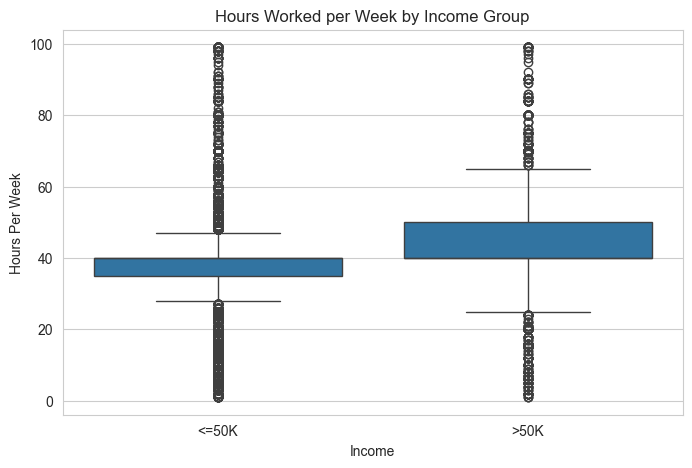

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="income", y="hours-per-week", data=adult_data)
plt.title("Hours Worked per Week by Income Group")
plt.xlabel("Income")
plt.ylabel("Hours Per Week")
plt.show()


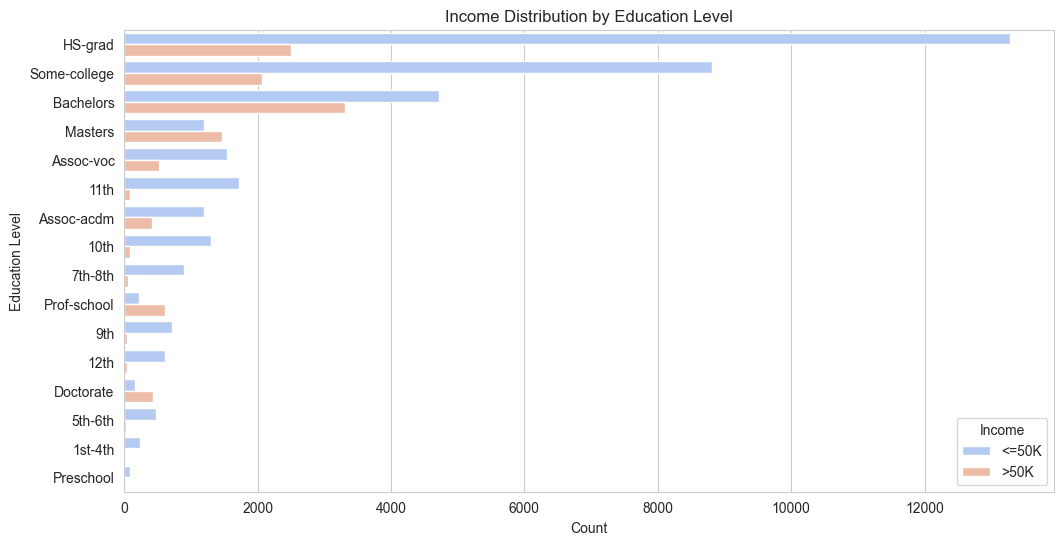

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(data=adult_data, y="education", hue="income", order=adult_data["education"].value_counts().index, palette="coolwarm")
plt.title("Income Distribution by Education Level")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.legend(title="Income")
plt.show()


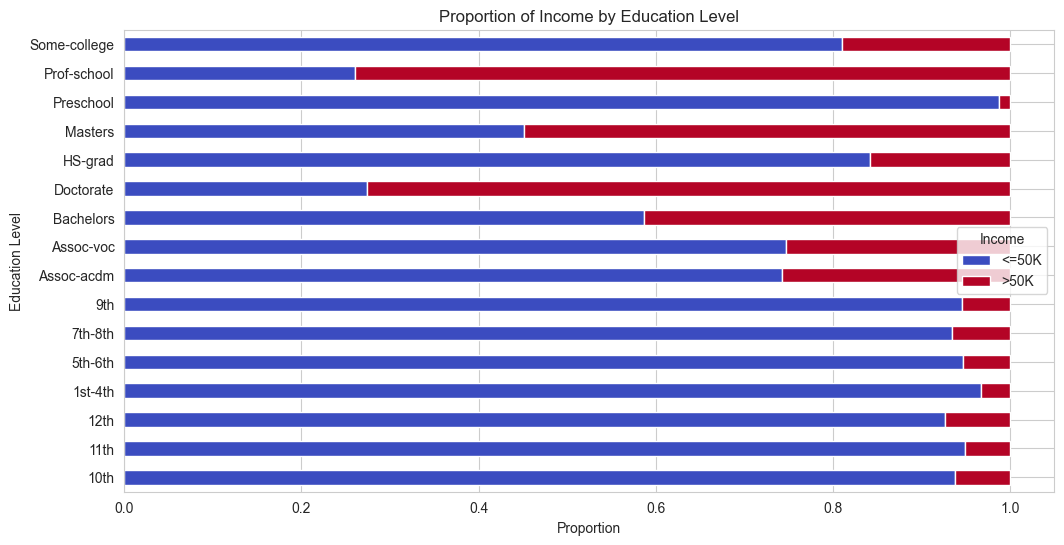

In [68]:
education_income = adult_data.groupby("education")["income"].value_counts(normalize=True).unstack()
education_income.plot(kind="barh", stacked=True, figsize=(12, 6), colormap="coolwarm")

plt.title("Proportion of Income by Education Level")
plt.xlabel("Proportion")
plt.ylabel("Education Level")
plt.legend(title="Income")
plt.show()


## Exercise 4

Complete an exploratory data analysis of the titanic dataset (it is on moodle). (Remember, you can load it in as `titanic_data = pd.read_csv("titanic_survival_data.csv")`)

## Exercise 5

Do an exploratory data analysis of the diabetes dataset. The cell below loads the dataset from the scikit learn package into the pandas dataframe called `diabetes_data`.

In [ ]:
from sklearn.datasets import load_diabetes
d_data = load_diabetes(as_frame=True)
diabetes_data = d_data.data
diabetes_data["Target"] = d_data.target

diabetes_data

ModuleNotFoundError: No module named 'sklearn'